In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import math
import sys
sys.path.append('./ecg2mem/')
sys.path.append("/usr/lib/python2.7/dist-packages")
import dataProc
import preprocess.pseudoEcg_curve as pseudoEcgC
import preprocess.pseudoEcg as pseudoEcg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


% matplotlib inline


In [2]:
# 配列の要素数
x = np.linspace(0, 199, 200)
y = np.linspace(0, 199, 200)

# 200×200の格子点を作成
X,Y= np.meshgrid(x, y)



In [3]:
def f(x, y):
    return  200**2 - (x-100)**2 - (y-100)**2

In [4]:
Z = f(X,Y)
print(Z)

[[ 20000.  20199.  20396. ...,  20591.  20396.  20199.]
 [ 20199.  20398.  20595. ...,  20790.  20595.  20398.]
 [ 20396.  20595.  20792. ...,  20987.  20792.  20595.]
 ..., 
 [ 20591.  20790.  20987. ...,  21182.  20987.  20790.]
 [ 20396.  20595.  20792. ...,  20987.  20792.  20595.]
 [ 20199.  20398.  20595. ...,  20790.  20595.  20398.]]


In [5]:
Z = np.sqrt(Z)
print(Z)

[[ 141.42135624  142.123186    142.81456508 ...,  143.49564453
   142.81456508  142.123186  ]
 [ 142.123186    142.821567    143.50958156 ...,  144.18737809
   143.50958156  142.821567  ]
 [ 142.81456508  143.50958156  144.19431334 ...,  144.86890626
   144.19431334  143.50958156]
 ..., 
 [ 143.49564453  144.18737809  144.86890626 ...,  145.54037241
   144.86890626  144.18737809]
 [ 142.81456508  143.50958156  144.19431334 ...,  144.86890626
   144.19431334  143.50958156]
 [ 142.123186    142.821567    143.50958156 ...,  144.18737809
   143.50958156  142.821567  ]]


In [6]:

Z=Z-200

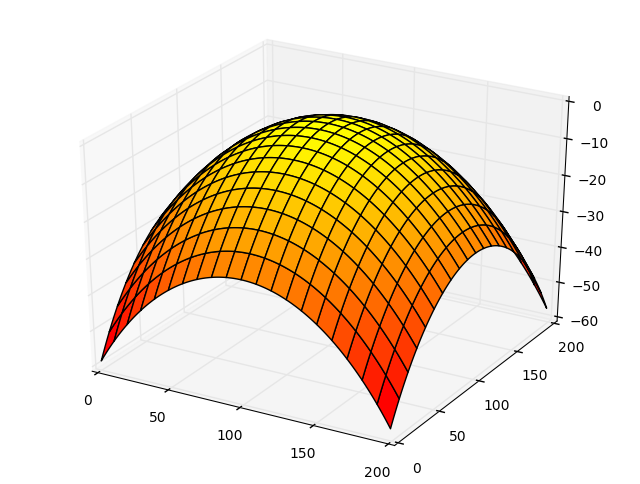

In [7]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap = "autumn")

plt.show()

In [8]:
x1 = np.array(range(0,200,1))
y1 = np.array(range(0,200,1))

In [9]:
Z0 = np.zeros((200,200))
z1 = random.uniform(-5.5, -11.1)
for  i  in x1:
    for j in y1:
        if Z[i,j]> z1:
            Z0[i,j]=z1
        else:
            Z0[i,j] =Z[i,j] 
Z0-= z1

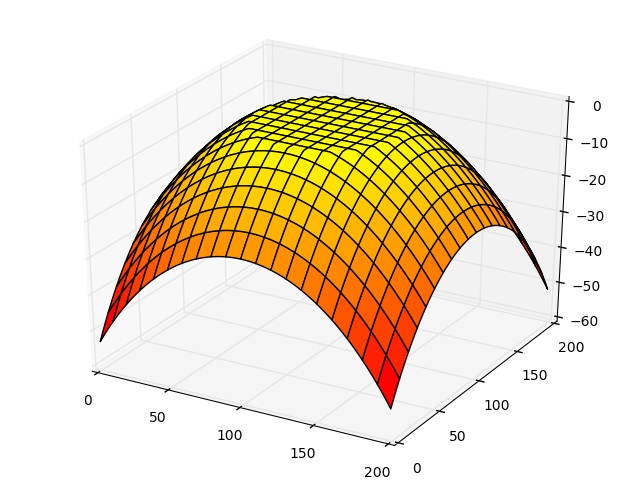

In [10]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z0, cmap = "autumn")
plt.show()

In [11]:
D=np.meshgrid(x, y)

In [12]:
map_xy = np.array(D, np.float32)
map_xy = np.swapaxes(map_xy, 0, 2)
map_xy

array([[[   0.,    0.],
        [   0.,    1.],
        [   0.,    2.],
        ..., 
        [   0.,  197.],
        [   0.,  198.],
        [   0.,  199.]],

       [[   1.,    0.],
        [   1.,    1.],
        [   1.,    2.],
        ..., 
        [   1.,  197.],
        [   1.,  198.],
        [   1.,  199.]],

       [[   2.,    0.],
        [   2.,    1.],
        [   2.,    2.],
        ..., 
        [   2.,  197.],
        [   2.,  198.],
        [   2.,  199.]],

       ..., 
       [[ 197.,    0.],
        [ 197.,    1.],
        [ 197.,    2.],
        ..., 
        [ 197.,  197.],
        [ 197.,  198.],
        [ 197.,  199.]],

       [[ 198.,    0.],
        [ 198.,    1.],
        [ 198.,    2.],
        ..., 
        [ 198.,  197.],
        [ 198.,  198.],
        [ 198.,  199.]],

       [[ 199.,    0.],
        [ 199.,    1.],
        [ 199.,    2.],
        ..., 
        [ 199.,  197.],
        [ 199.,  198.],
        [ 199.,  199.]]], dtype=float32)

In [13]:
map_xyz = np.zeros((200,200)+(3,), np.float32)
map_xyz[:, :, 0:2] = map_xy
map_xyz[:, :, 2] = Z0
map_xyz

array([[[   0.        ,    0.        ,  -53.0786438 ],
        [   0.        ,    1.        ,  -52.3768158 ],
        [   0.        ,    2.        ,  -51.68543625],
        ..., 
        [   0.        ,  197.        ,  -51.00435638],
        [   0.        ,  198.        ,  -51.68543625],
        [   0.        ,  199.        ,  -52.3768158 ]],

       [[   1.        ,    0.        ,  -52.3768158 ],
        [   1.        ,    1.        ,  -51.67843246],
        [   1.        ,    2.        ,  -50.99041748],
        ..., 
        [   1.        ,  197.        ,  -50.31262207],
        [   1.        ,  198.        ,  -50.99041748],
        [   1.        ,  199.        ,  -51.67843246]],

       [[   2.        ,    0.        ,  -51.68543625],
        [   2.        ,    1.        ,  -50.99041748],
        [   2.        ,    2.        ,  -50.30568695],
        ..., 
        [   2.        ,  197.        ,  -49.63109207],
        [   2.        ,  198.        ,  -50.30568695],
        [   2.     

# 上記をmap_xyzという関数で定義した

In [2]:
phie = dataProc.loadData('/mnt/Omer/Project/07.DeepElectrodeMapping/simulation/20190524_2/phie_')

In [20]:
map_xyz= pseudoEcgC.mapCurveSpec(-5.5)


In [28]:
elec = np.array([[30, 100, 2]])
pecg = pseudoEcgC.calcPecgSequenceCurve(phie, elec,map_xyz)

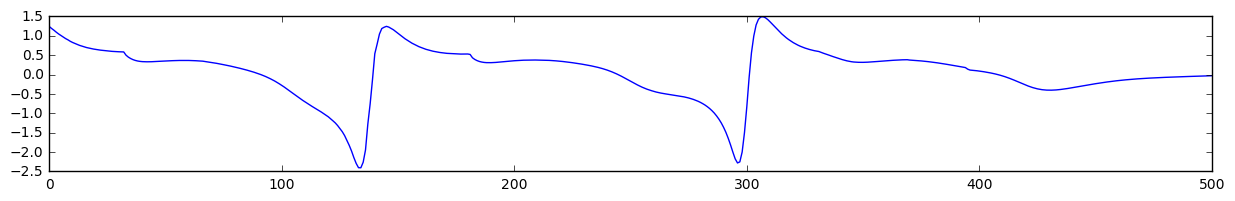

In [29]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [44]:
elec = np.array([[130, 100, 2]])
pecg = pseudoEcg.calcPecgSequence(phie, elec)

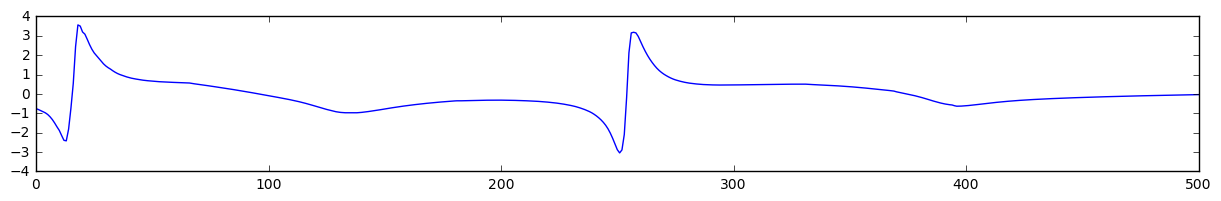

In [45]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [42]:
elec = np.array([[50, 50, 2]])
pecg = pseudoEcgC.calcPecgSequenceCurve(phie, elec,map_xyz)

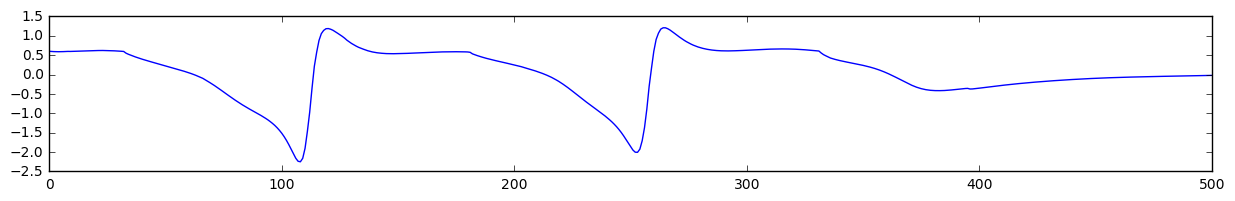

In [43]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [46]:
elec = np.array([[50, 50, 2]])
pecg = pseudoEcg.calcPecgSequence(phie, elec)

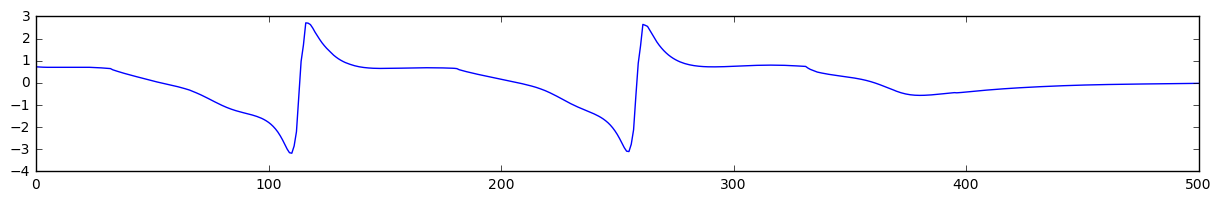

In [47]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [21]:
elec = np.array([[150, 100, 2]])
pecg = pseudoEcgC.calcPecgSequenceCurve(phie, elec,map_xyz)

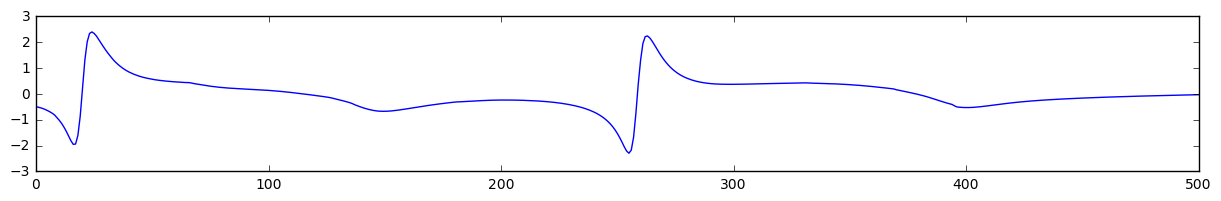

In [22]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [23]:
elec = np.array([[150, 100, 2]])
pecg = pseudoEcg.calcPecgSequence(phie, elec)

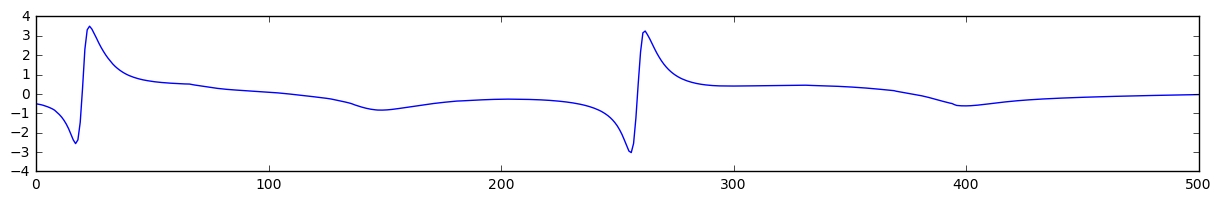

In [24]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [25]:
elec = np.array([[30, 100, 2]])
pecg = pseudoEcgC.calcPecgSequenceCurve(phie, elec,map_xyz)

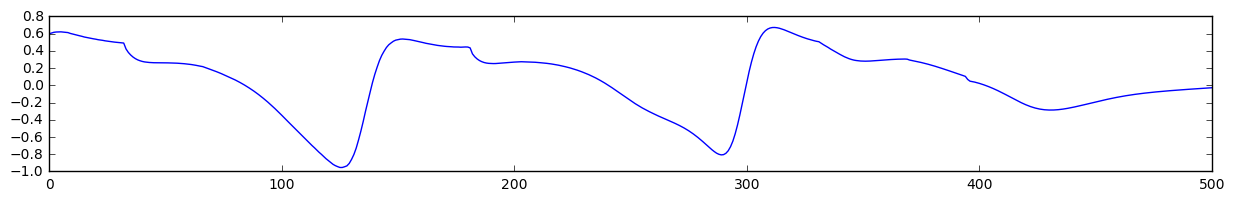

In [26]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [29]:
elec = np.array([[30, 100, 2]])
pecg = pseudoEcg.calcPecgSequence(phie, elec)

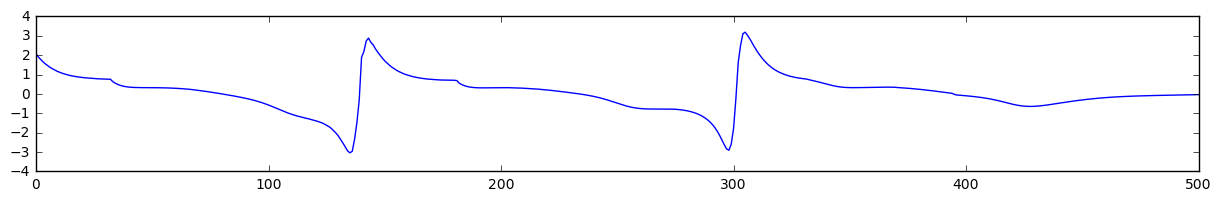

In [30]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [31]:
elec = np.array([[50, 100, 2]])
pecg = pseudoEcgC.calcPecgSequenceCurve(phie, elec,map_xyz)

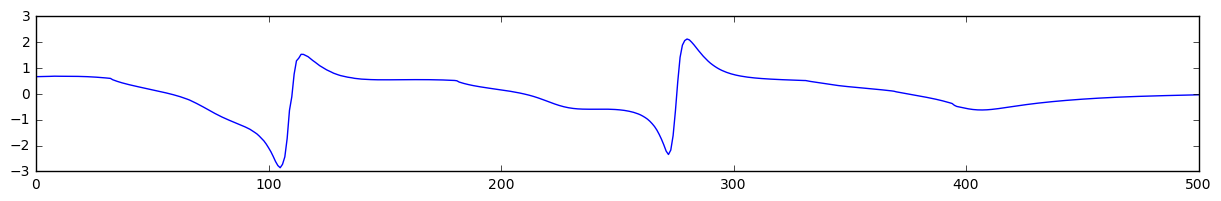

In [32]:
plt.figure(figsize=(15,2))
plt.plot(pecg)

In [33]:
elec = np.array([[50, 100, 2]])
pecg = pseudoEcg.calcPecgSequence(phie, elec)

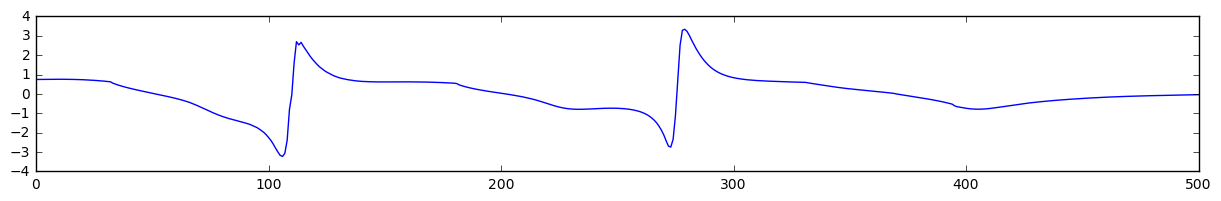

In [34]:
plt.figure(figsize=(15,2))
plt.plot(pecg)